## **Task 6: Prediction using Decision Tree Algorithm<br><br> Aim: To create the Decision Tree classifier on Iris Dataset and visualize it graphically.**

> ## By: B.N.S.Kowshik Vinay Kumar

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

## Data processing and Visualization

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Iris.csv"
dataset = pd.read_csv(path)

In [ ]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.size

900

In [ ]:
# To understand above shape of data
dataset.shape    # First,second vals tell about no of rows and columns respectively

(150, 6)

In [ ]:
# Include O gives the information about categorical data
dataset.describe(include =['O'])

,Species
count,150
unique,3
top,Iris-virginica
freq,50


In [ ]:
# gives info about columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
dataset['Species'].value_counts()  # to know about different types of species

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [ ]:
dataset = dataset.drop(labels=  'Id', axis = 1)

In [ ]:
# fonts for plot titles
font0 = {'color':'red', 'fontsize': '14', 'fontweight': 'bold' }
font1 = {'color':'blue', 'fontsize': '14', 'fontweight': 'bold' }
font2 = {'color':'black', 'fontsize': '16', 'fontweight': 'bold' }

# Encoding categoricl data to numerical data
species_dict = {
    'Iris-setosa': int('0'),
    'Iris-versicolor': int('1'),
    'Iris-virginica': int('2')
}

species = dataset['Species'].map(species_dict, dataset)
dataset['Species'] = species

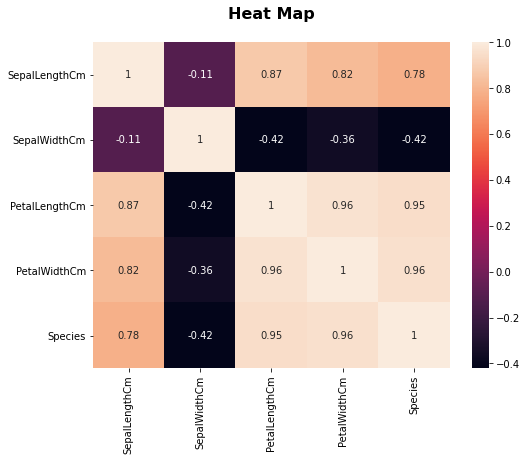

In [ ]:
# Heat map 
colcor = dataset.corr()  #gives correlation btw columns
plt.figure(figsize = (8,6))
sns.heatmap(colcor, annot=True)
plt.title('Heat Map\n',font2)
plt.show()

### Pairplots

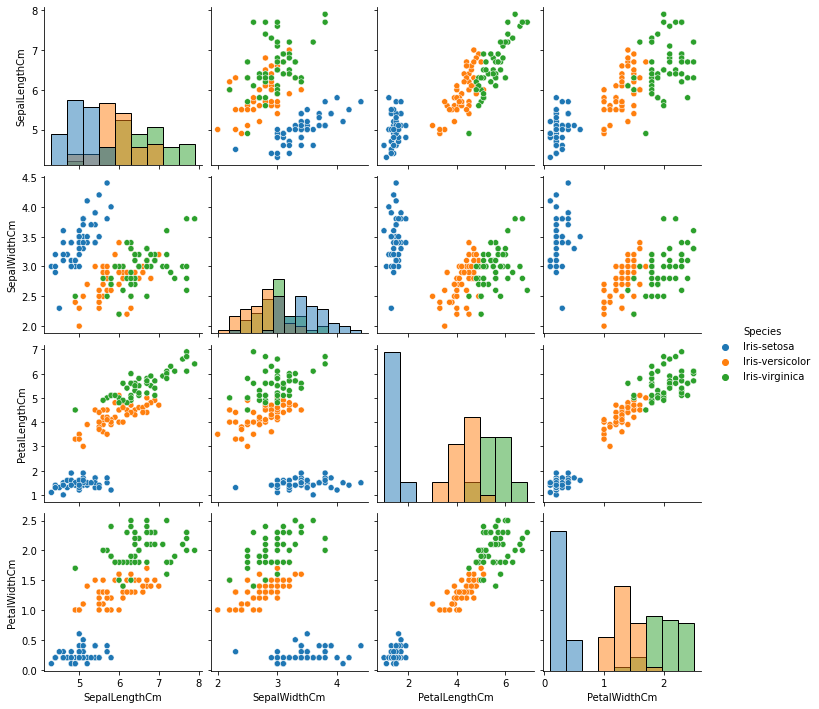

In [ ]:
sns.pairplot(data, hue="Species", diag_kind="hist")

## Decision Tree Classifier Implementation

In [ ]:
data = dataset.drop(labels=  ['Species'], axis = 1)
X = data.iloc[:,0:4].values
y = species
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.2, random_state=10)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(Xtrain,ytrain)

#Predicting y for test dataset
ypred = clf.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score

accurcy = round(accuracy_score(ytest,ypred),4)
print('The accuracy of Decision Tree classifier is ', accurcy)


The accuracy of Decision Tree classifier is  0.9667


## Now lets see how the Decision Tree classifier works


## Textual Representation of Decision Tree classifier

#### In this, textual representation we can see the pseudocode for Decision tree Claasifier

In [ ]:
from sklearn.tree import export_text
text_rep = export_text(clf, feature_names= list(data.columns), show_weights=True)
print(text_rep)

|--- PetalLengthCm <= 2.45
|   |--- weights: [40.00, 0.00, 0.00] class: 0
|--- PetalLengthCm >  2.45
|   |--- PetalLengthCm <= 4.75
|   |   |--- PetalWidthCm <= 1.65
|   |   |   |--- weights: [0.00, 33.00, 0.00] class: 1
|   |   |--- PetalWidthCm >  1.65
|   |   |   |--- weights: [0.00, 0.00, 1.00] class: 2
|   |--- PetalLengthCm >  4.75
|   |   |--- PetalWidthCm <= 1.75
|   |   |   |--- SepalWidthCm <= 2.65
|   |   |   |   |--- weights: [0.00, 0.00, 2.00] class: 2
|   |   |   |--- SepalWidthCm >  2.65
|   |   |   |   |--- PetalLengthCm <= 5.05
|   |   |   |   |   |--- weights: [0.00, 2.00, 0.00] class: 1
|   |   |   |   |--- PetalLengthCm >  5.05
|   |   |   |   |   |--- SepalWidthCm <= 2.75
|   |   |   |   |   |   |--- weights: [0.00, 1.00, 0.00] class: 1
|   |   |   |   |   |--- SepalWidthCm >  2.75
|   |   |   |   |   |   |--- weights: [0.00, 0.00, 2.00] class: 2
|   |   |--- PetalWidthCm >  1.75
|   |   |   |--- PetalLengthCm <= 4.85
|   |   |   |   |--- SepalLengthCm <= 5.95
|   

## Visualization of Decision Tree Classifier 

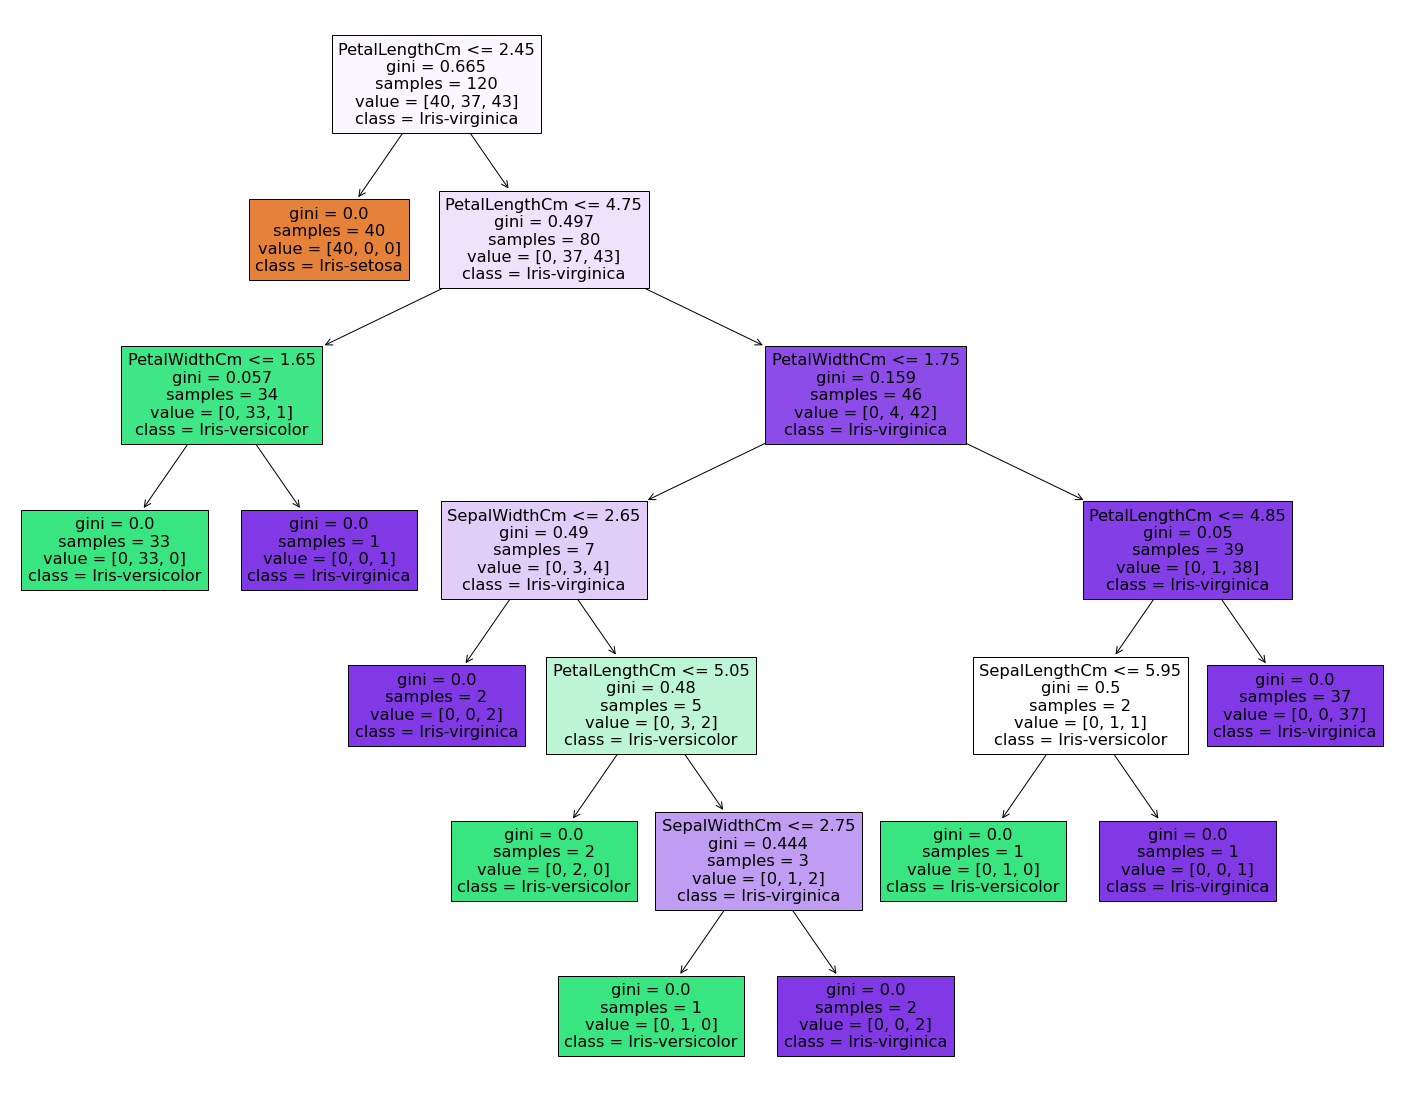

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, feature_names=data.columns,class_names=dataset['Species'].unique(),filled=True)
plt.show()

## To understand above visualization better

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


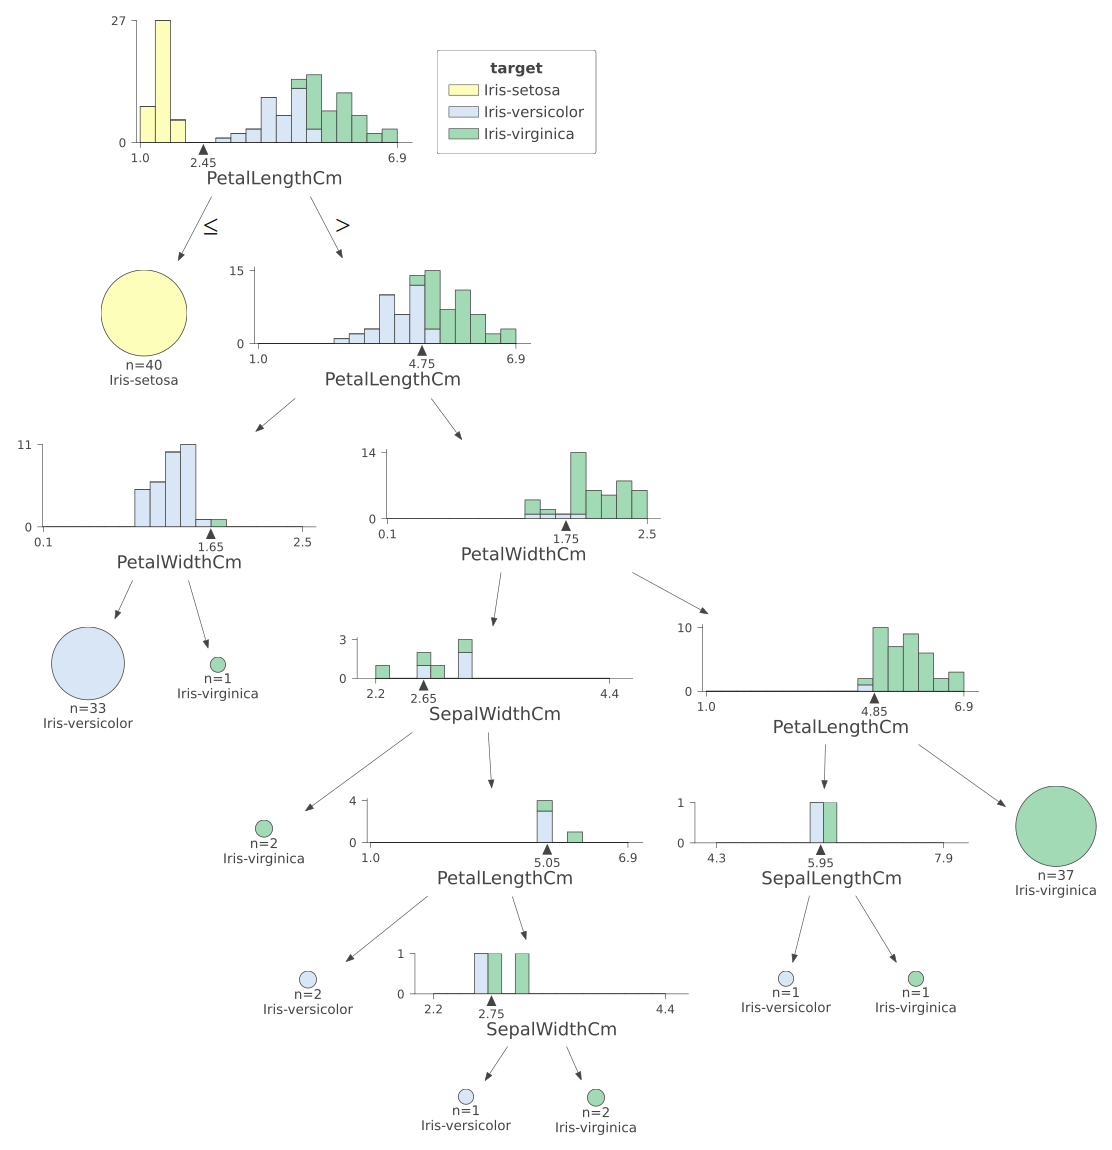

In [ ]:
from dtreeviz.trees import dtreeviz

img = dtreeviz(clf, Xtrain, ytrain,
                target_name="target",
                feature_names=data.columns,
                class_names=list(dataset['Species'].unique()),scale = 2)
img